In [70]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
from matplotlib import pyplot as plt

Production of Vale SA for the first half of the year

In [2]:
production_dict = {'Iron': 127203,
                   'Pallets': 13997,
                   'Manganese': 512,
                   'Coal': 3246,
                   'Nickel': 112.6,
                   'Copper': 179,
                   'Cobalt': 2507,
                   'Gold': 119}

In [20]:
prod_df = pd.DataFrame(data=production_dict, index=['Volume']).transpose()

In [21]:
prod_df

,Volume
Iron,127203.0
Pallets,13997.0
Manganese,512.0
Coal,3246.0
Nickel,112.6
Copper,179.0
Cobalt,2507.0
Gold,119.0


In [25]:
prod_df['Share'] = prod_df['Volume']/sum(prod_df['Volume'])

In [28]:
prod_df

,Volume,Share
Iron,127203.0,0.860203
Pallets,13997.0,0.094654
Manganese,512.0,0.003462
Coal,3246.0,0.021951
Nickel,112.6,0.000761
Copper,179.0,0.001210
Cobalt,2507.0,0.016953
Gold,119.0,0.000805


86% production is Iron, let's check correlation

In [43]:
vale_df = yf.download(tickers='VALE ', period='10y', interval='1d', group_by='ticker', threads=True)

[*********************100%***********************]  1 of 1 completed


In [41]:
iron_fut = pd.read_csv('iron_futures.csv')

In [46]:
iron_fut = iron_fut.iloc[::-1] # reverse dat

In [44]:
vale_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-26,27.770000,27.799999,27.340000,27.590000,18.681921,13304900
2010-07-27,27.870001,27.959999,27.120001,27.440001,18.580353,16761500
2010-07-28,27.400000,27.959999,27.370001,27.780001,18.810575,18770200
2010-07-29,28.080000,28.309999,27.549999,27.559999,18.661604,23460300
2010-07-30,27.469999,28.219999,27.309999,27.799999,18.824116,21397000
...,...,...,...,...,...,...
2020-07-20,11.320000,11.500000,11.300000,11.440000,11.440000,20665900
2020-07-21,11.440000,11.580000,11.350000,11.460000,11.460000,27837400
2020-07-22,11.720000,11.720000,11.510000,11.580000,11.580000,28233600


In [56]:
iron_fut['datetime'] = pd.to_datetime(iron_fut['Date'], format='%b %d, %Y')

<ipython-input-56-30c0ddf70759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iron_fut['datetime'] = pd.to_datetime(iron_fut['Date'], format='%b %d, %Y')


In [60]:
iron_fut = iron_fut.set_index('datetime')

In [61]:
iron_fut

,Date,Price,Open,High,Low,Vol.,Change %
datetime,,,,,,,
2010-10-25,"Oct 25, 2010",145.00,145.00,145.00,145.00,-,0.76%
2010-10-26,"Oct 26, 2010",145.10,145.10,145.10,145.10,-,0.07%
2010-10-27,"Oct 27, 2010",144.50,144.50,144.50,144.50,-,-0.41%
2010-10-28,"Oct 28, 2010",144.00,144.00,144.00,144.00,-,-0.35%
2010-10-29,"Oct 29, 2010",147.50,147.50,147.50,147.50,-,2.43%
...,...,...,...,...,...,...,...
2020-07-20,"Jul 20, 2020",107.18,107.18,107.18,107.18,-,-0.04%
2020-07-21,"Jul 21, 2020",107.58,107.58,107.58,107.58,-,0.37%
2020-07-22,"Jul 22, 2020",108.04,108.04,108.04,108.04,-,0.43%


In [62]:
merged_df = pd.merge(vale_df, iron_fut, how='inner', left_index=True, right_index=True) # merge on data

In [84]:
merged_df

,Open_x,High_x,Low_x,Close,Adj Close,Volume,Date,Price,Open_y,High_y,Low_y,Vol.,Change %,ValeLogR,IronLogR,ValeCumSum,IronCumSum
2010-10-26,32.119999,32.930000,31.879999,32.840000,22.463800,17436400,"Oct 26, 2010",145.10,145.10,145.10,145.10,-,0.07%,-0.009913,0.000689,-0.009913,0.000689
2010-10-27,32.580002,32.580002,31.680000,32.029999,21.909729,21376000,"Oct 27, 2010",144.50,144.50,144.50,144.50,-,-0.41%,0.014220,-0.004144,0.004306,-0.003454
2010-10-28,32.430000,32.669998,31.799999,31.799999,21.752403,26759000,"Oct 28, 2010",144.00,144.00,144.00,144.00,-,-0.35%,-0.004615,-0.003466,-0.000308,-0.006920
2010-10-29,31.840000,32.259998,31.719999,32.139999,21.984978,20335200,"Oct 29, 2010",147.50,147.50,147.50,147.50,-,2.43%,-0.018361,0.024015,-0.018669,0.017094
2010-11-01,32.060001,32.680000,32.049999,32.419998,22.176504,18073700,"Nov 01, 2010",146.00,146.00,146.00,146.00,-,-1.02%,0.006886,-0.010222,-0.011783,0.006873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-20,11.320000,11.500000,11.300000,11.440000,11.440000,20665900,"Jul 20, 2020",107.18,107.18,107.18,107.18,-,-0.04%,-0.009670,-0.000373,-1.052821,-0.302224
2020-07-21,11.440000,11.580000,11.350000,11.460000,11.460000,27837400,"Jul 21, 2020",107.58,107.58,107.58,107.58,-,0.37%,0.010545,0.003725,-1.042276,-0.298499
2020-07-22,11.720000,11.720000,11.510000,11.580000,11.580000,28233600,"Jul 22, 2020",108.04,108.04,108.04,108.04,-,0.43%,0.024181,0.004267,-1.018095,-0.294232
2020-07-23,11.590000,11.660000,11.290000,11.290000,11.290000,27353300,"Jul 23, 2020",107.78,107.78,107.78,107.78,-,-0.24%,-0.011154,-0.002409,-1.029250,-0.296642


In [65]:
merged_df[['Open_x', 'Open_y']].corr(method='pearson')

,Open_x,Open_y
Open_x,1.000000,0.902694
Open_y,0.902694,1.000000


Correlation is really high

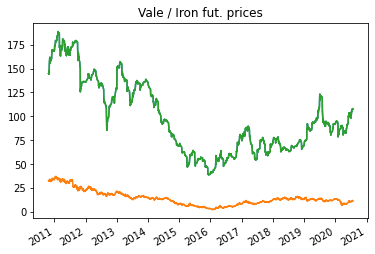

In [69]:
plt.figure()
sr = merged_df['Open_x']
sr1 = merged_df['Open_y']
sr1.plot(title='Vale / Iron fut. prices')
sr.plot()
sr1.plot()
plt.show()

In [71]:
merged_df['ValeLogR'] = np.log(merged_df['Open_x']) - np.log(merged_df['Open_x'].shift(1))

In [73]:
merged_df['IronLogR'] = np.log(merged_df['Open_y']) - np.log(merged_df['Open_y'].shift(1))

In [78]:
merged_df = merged_df.dropna()

In [79]:
merged_df['ValeCumSum'] = merged_df['ValeLogR'].cumsum()

<ipython-input-79-1e4db36a9375>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['ValeCumSum'] = merged_df['ValeLogR'].cumsum()


In [81]:
merged_df['IronCumSum'] = merged_df['IronLogR'].cumsum()

<ipython-input-81-890e2d7c76f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['IronCumSum'] = merged_df['IronLogR'].cumsum()


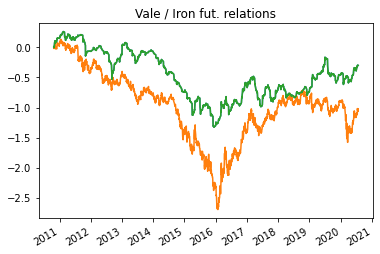

In [82]:
plt.figure()
sr = merged_df['ValeCumSum']
sr1 = merged_df['IronCumSum']
sr1.plot(title='Vale SA/ Iron fut. relations')
sr.plot()
sr1.plot()
plt.show()

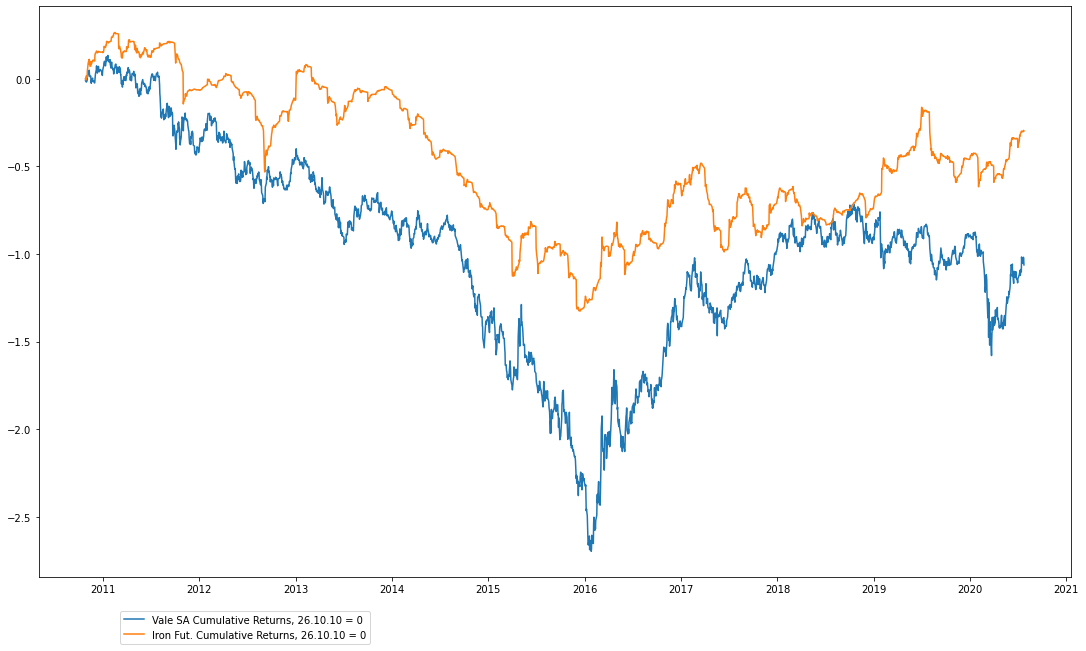

In [97]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(merged_df.index, merged_df['ValeCumSum'], label='Vale SA Cumulative Returns, 26.10.10 = 0')
ax.plot(merged_df.index, merged_df['IronCumSum'], label='Iron Fut. Cumulative Returns, 26.10.10 = 0')
ax.legend(loc='upper center', bbox_to_anchor=(0.2, -0.05))
fig.set_size_inches(18.5, 10.5)
plt.show()

In [101]:
merged_df['TimeCorr'] = ['']*len(merged_df)

<ipython-input-101-f4ec14fd6d4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['TimeCorr'] = ['']*len(merged_df)


In [102]:
merged_df

,Open_x,High_x,Low_x,Close,Adj Close,Volume,Date,Price,Open_y,High_y,Low_y,Vol.,Change %,ValeLogR,IronLogR,ValeCumSum,IronCumSum,TimeCorr
2010-10-26,32.119999,32.930000,31.879999,32.840000,22.463800,17436400,"Oct 26, 2010",145.10,145.10,145.10,145.10,-,0.07%,-0.009913,0.000689,-0.009913,0.000689,
2010-10-27,32.580002,32.580002,31.680000,32.029999,21.909729,21376000,"Oct 27, 2010",144.50,144.50,144.50,144.50,-,-0.41%,0.014220,-0.004144,0.004306,-0.003454,
2010-10-28,32.430000,32.669998,31.799999,31.799999,21.752403,26759000,"Oct 28, 2010",144.00,144.00,144.00,144.00,-,-0.35%,-0.004615,-0.003466,-0.000308,-0.006920,
2010-10-29,31.840000,32.259998,31.719999,32.139999,21.984978,20335200,"Oct 29, 2010",147.50,147.50,147.50,147.50,-,2.43%,-0.018361,0.024015,-0.018669,0.017094,
2010-11-01,32.060001,32.680000,32.049999,32.419998,22.176504,18073700,"Nov 01, 2010",146.00,146.00,146.00,146.00,-,-1.02%,0.006886,-0.010222,-0.011783,0.006873,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-20,11.320000,11.500000,11.300000,11.440000,11.440000,20665900,"Jul 20, 2020",107.18,107.18,107.18,107.18,-,-0.04%,-0.009670,-0.000373,-1.052821,-0.302224,
2020-07-21,11.440000,11.580000,11.350000,11.460000,11.460000,27837400,"Jul 21, 2020",107.58,107.58,107.58,107.58,-,0.37%,0.010545,0.003725,-1.042276,-0.298499,
2020-07-22,11.720000,11.720000,11.510000,11.580000,11.580000,28233600,"Jul 22, 2020",108.04,108.04,108.04,108.04,-,0.43%,0.024181,0.004267,-1.018095,-0.294232,
2020-07-23,11.590000,11.660000,11.290000,11.290000,11.290000,27353300,"Jul 23, 2020",107.78,107.78,107.78,107.78,-,-0.24%,-0.011154,-0.002409,-1.029250,-0.296642,


In [152]:
corr_list = []

In [153]:
for i in range(len(merged_df)-1):
    corr_list.append(merged_df[:i][['Open_x', 'Open_y']].corr(method='pearson')[:1]['Open_y'].values[0])

In [154]:
len(merged_df)

2438

In [159]:
len(corr_list)

2438

In [158]:
corr_list = [0] + corr_list

In [160]:
merged_df['TimeCorr'] = corr_list

In [163]:
merged_df = merged_df.dropna()

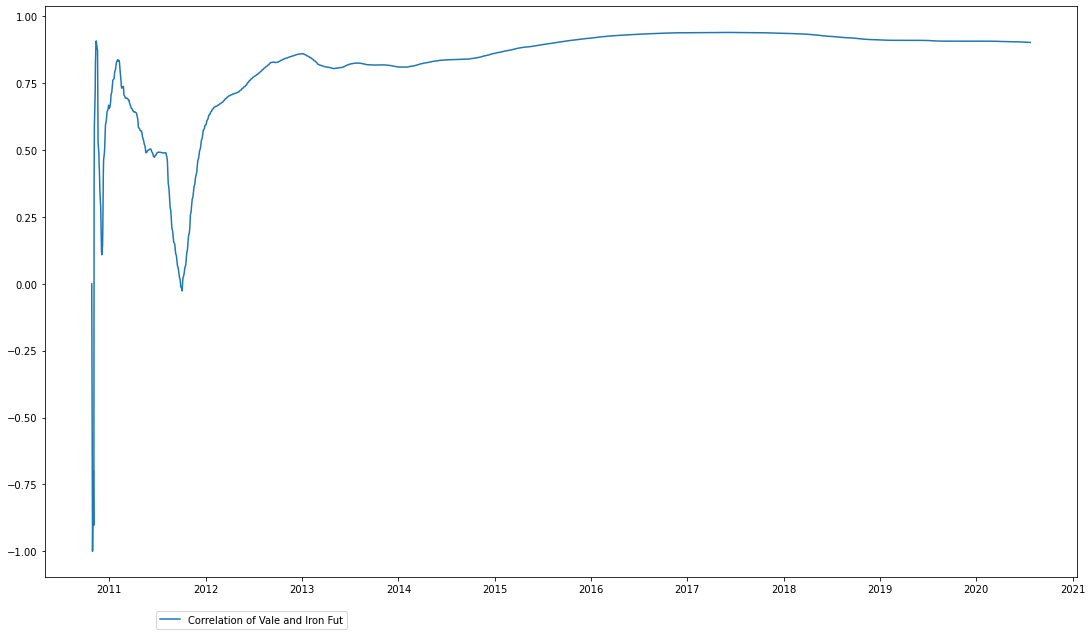

In [164]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(merged_df.index, merged_df['TimeCorr'], label='Correlation of Vale and Iron Fut')
ax.legend(loc='upper center', bbox_to_anchor=(0.2, -0.05))
fig.set_size_inches(18.5, 10.5)
plt.show()